<a href="https://colab.research.google.com/github/MathiasSchindlerCPH/BSE-T2-TextMining-repo/blob/main/PSET2_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Set 2**

Course: *Text Mining: Models and Algorithms*

Submitted: Jan 21, 2022

Student(s): Björn Komander, Mathias Schindler, Cristina Susanu, Simón Caicedo

**Remember: Add column with 'political party' to our datasets!**

## **Preamble**

Mount G Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.chdir('/content/drive/My Drive/--T2-Text-Mining/PSET2/')

Load packages

In [3]:
!pip install twarc

     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 98 kB 4.9 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=e5bb1e5fb44132bc782987e9c79344d12e7816003f2633ddfe9a51b180b20f17
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj
  Attempting uninstall: humanize
    Found existing installation: humanize 0.5.1
    Uninstalling humanize-0.5.1:
      Successfully uninstalled humanize-0.5.1


In [1]:
!pip install twarc_csv

In [46]:
import pandas as pd
import json
from twarc_csv import DataFrameConverter
from twarc.expansions import ensure_flattened
import pandas as pd
from twarc_csv import dataframe_converter
from twarc_csv import CSVConverter, DataFrameConverter
import seaborn as sns
import matplotlib.pyplot as plt

# First Attempt to Convert `.json` to `.csv`

In [11]:
df2018 = pd.read_json('tweets2018.json', lines=True)
df2018.to_csv("df2018.csv") #<- saves .csv in G Drive to load in R
print(df2018)

                                                  data  ...                                             errors
0    [{'source': 'Twitter for iPhone', 'conversatio...  ...                                                NaN
1    [{'entities': {'hashtags': [{'start': 0, 'end'...  ...                                                NaN
2    [{'lang': 'es', 'text': 'RT @CEJ_JUSTICIA: En ...  ...                                                NaN
3    [{'entities': {'mentions': [{'start': 87, 'end...  ...  [{'parameter': 'entities.mentions.username', '...
4    [{'reply_settings': 'everyone', 'created_at': ...  ...                                                NaN
..                                                 ...  ...                                                ...
158  [{'entities': {'urls': [{'start': 42, 'end': 6...  ...                                                NaN
159  [{'attachments': {'media_keys': ['7_1002688768...  ...                                                NaN
1

In [12]:
df2017 = pd.read_json('tweets2017.json', lines=True)
df2017.to_csv("df2017.csv") #<- saves .csv in G Drive to load in R
print(df2017)

                                                  data  ...                                            __twarc
0    [{'id': '870765471573954561', 'text': 'Felicit...  ...  {'url': 'https://api.twitter.com/2/tweets/sear...
1    [{'possibly_sensitive': False, 'entities': {'a...  ...  {'url': 'https://api.twitter.com/2/tweets/sear...
2    [{'lang': 'es', 'text': 'Se ha intensificado l...  ...  {'url': 'https://api.twitter.com/2/tweets/sear...
3    [{'referenced_tweets': [{'type': 'retweeted', ...  ...  {'url': 'https://api.twitter.com/2/tweets/sear...
4    [{'id': '866803560901685250', 'entities': {'me...  ...  {'url': 'https://api.twitter.com/2/tweets/sear...
..                                                 ...  ...                                                ...
109  [{'referenced_tweets': [{'type': 'retweeted', ...  ...  {'url': 'https://api.twitter.com/2/tweets/sear...
110  [{'possibly_sensitive': False, 'source': 'Twit...  ...  {'url': 'https://api.twitter.com/2/tweets/sear...
1

# Convert `.json` with Luis' Code

Convert `.json`-files to pandas dataframes using Luis' code

In [9]:
converter = DataFrameConverter()

for data_json in ["tweets2017", "tweets2018"]:
    data = []
    with open(data_json + ".json") as f:
        for line in f:
            data.append(json.loads(line))
    vars()[data_json] = converter.process(data)

Try Luis' `hash_retrieve`-function

In [13]:
def hash_retrieve(df):
    """
    df : dataframe of tweets
    Description: 
        The function takes as an object a df of tweets obtained via twarc and 
        returns a generator object.
    
    """
    for line, id in zip(df['entities.hashtags'], df['id']):
        if pd.isna(line):
            continue
        line = line.strip()
        data = json.loads(line)
        for hashtag in ensure_flattened(data):
            #print(hashtag['tag'],id)
            yield [hashtag['tag'], id]

# Exercise 1: Top Ten Hashtags in 2017, 2018

In [14]:
# Using the generator to create a new dataframe.
a2017 = pd.DataFrame(list(hash_retrieve(tweets2017)),
                columns=['hashtag', 'id'])
a2018 = pd.DataFrame(list(hash_retrieve(tweets2018)),
                 columns=['hashtag', 'id'])
print(a2017); print(a2018)

                       hashtag                  id
0     RecuperaciónDeLaEconomía  870654978469367808
1           Presidenciales2018  870654978469367808
2     RecuperacionDeLaEconomía  870481396317528064
3     RecuperaciónDeLaEconomía  870438369771302912
4     RecuperaciónDeLaEconomía  870437325242855425
...                        ...                 ...
3651                    AlAire  866712511499948033
3652                  Medellin  866712511499948033
3653         orgullocolombiano  868497950917439488
3654             debercumplido  868492220181221376
3655         OrgulloColombiano  866391111203475458

[3656 rows x 2 columns]
                     hashtag                   id
0                     Bogotá  1003039823416963077
1          ElFuturoEsDeTodos  1003039823416963077
2          ElFuturoEsDeTodos  1003017161047183360
3                     Bogotá  1003013212059684864
4          ElFuturoEsDeTodos  1003013212059684864
...                      ...                  ...
9890  VargasL

In [58]:
top10_hash_17 = a2017.groupby('hashtag').nunique().sort_values(by = 'id', ascending = False)[:10]
top10_hash_18 = a2018.groupby('hashtag').nunique().sort_values(by = 'id', ascending = False)[:10]
print(top10_hash_17);print(top10_hash_18)

                           id
hashtag                      
PeroAlMenosNoSoyComoUribe  82
MásValePayasoQueUribista   69
ForoSeguridadCali          69
YoTambiénQuieroSerPayaso   67
SeríaUnBandiditoSi         65
MasValePayasoQueUribista   62
AlAire                     61
UribeNoEsUnPayaso          45
recuperarlaeconomia        39
ConsultaAnticorrupcion     39
                        id
hashtag                   
ElFuturoEsDeTodos      478
SePuede                377
FajardoPresidente      236
VotoChallenge          228
ColombiaDecide         211
ElDebate               158
LaRemontadaDeFajardo   148
PetroPresidente        134
EleccionesColombia     125
YoutubersVsCandidatos  125


In [76]:
# Barplot function
def hashtag_plot(df: pd.DataFrame, year: int):
  sns.set_theme(style="whitegrid")
  f, ax = plt.subplots(figsize=(15, 6))
  ax = sns.barplot(x=df.index, y="id", data=df)
  ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 20, size=9)
  plt.title('Colombian Politicians',fontsize=14, style="italic")
  plt.suptitle("Top 10 Hashtags for " + str(year), weight="bold").set_fontsize('20')
  plt.xlabel("Hashtag").set_fontsize('13')
  plt.ylabel("# Tweets with hashtag").set_fontsize('13')
  plt.show()

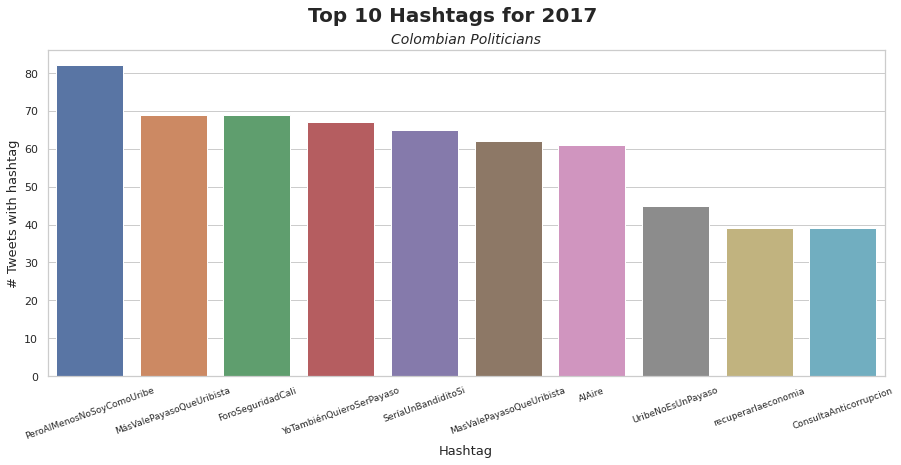

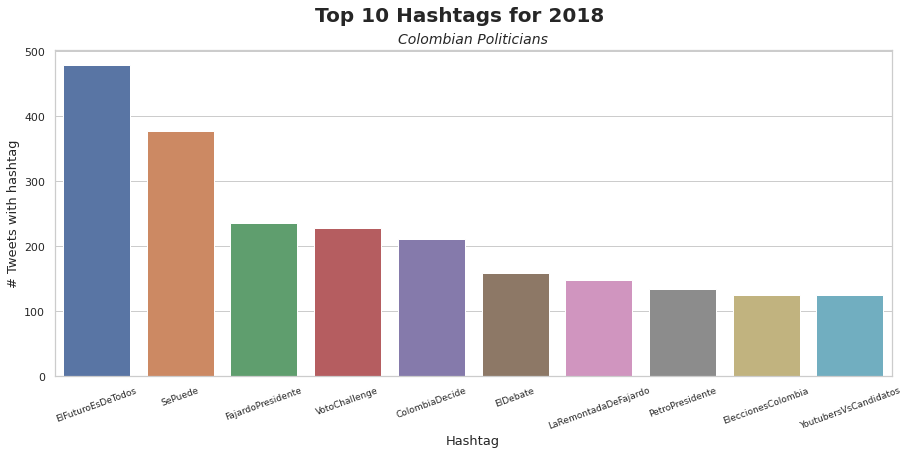

In [77]:
hashtag_plot(top10_hash_17, 2017); hashtag_plot(top10_hash_18, 2018)

# Exercise 2: Top Five Politicians of Hashtag Usage

**Remember: Add column with 'political party' to our datasets!**